In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [58]:
models = [f[:-4] for f in os.listdir('../stats/') if f.endswith(".npy")]
models.sort()
#models = ['test']
num_steps = 500
colors = ['#204594', '#95B333', '#FD9D59', '#F585A5', '#CDB460', '#3AB5D4', '#B72220', '#FEE30E', '#319848', '#5f1250', '#e7221a']

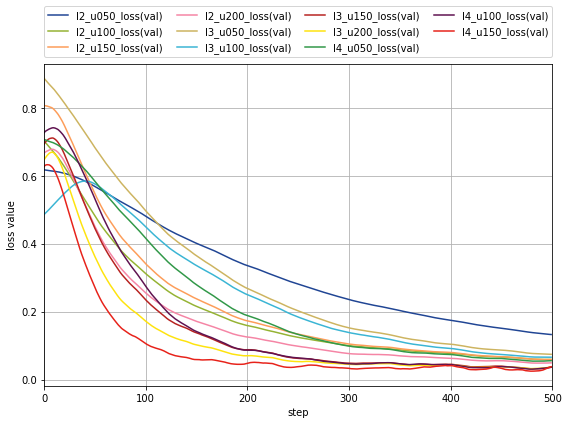

In [59]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for modelname, colorname in zip(models, colors):
    stats = np.load('../stats/'+modelname+".npy")
    #ax.plot(range(num_steps), stats[:,0], label=modelname+"_loss(train)", color=colorname, alpha=0.5, linestyle='--')
    ax.plot(range(num_steps), stats[:,3], label=modelname+"_loss(val)", color=colorname)
lgd = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=4, mode="expand", borderaxespad=0)
ax.set_xlim(0, num_steps)
ax.set_xlabel("step")
ax.set_ylabel("loss value")
ax.grid()
fig.tight_layout()
fig.savefig("loss.pdf", bbox_extra_artists=(fig,), bbox_inches='tight')

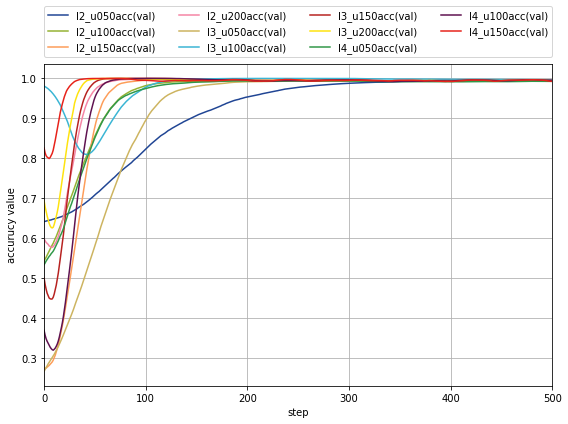

In [60]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for modelname, colorname in zip(models, colors):
    stats = np.load('../stats/'+modelname+".npy")
    #ax.plot(range(num_steps), stats[:,1], label=modelname+"acc(train)", color=colorname, alpha=0.5, linestyle='--')
    ax.plot(range(num_steps), stats[:,4], label=modelname+"acc(val)", color=colorname)
lgd = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=4, mode="expand", borderaxespad=0)
ax.set_xlim(0, num_steps)
ax.set_xlabel("step")
ax.set_ylabel("accurucy value")
ax.grid()
fig.tight_layout()
fig.savefig("acc.pdf", bbox_extra_artists=(fig,), bbox_inches='tight')

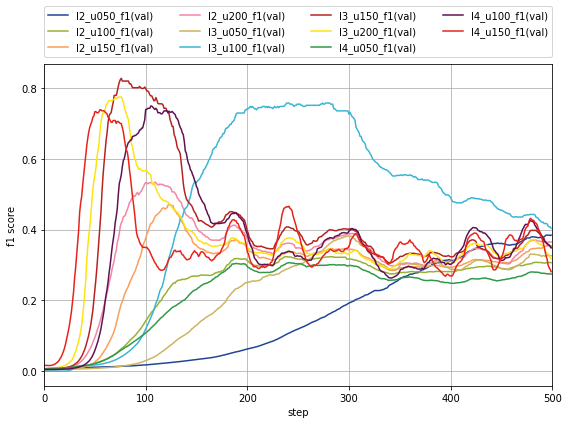

In [61]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for modelname, colorname in zip(models, colors):
    stats = np.load('../stats/'+modelname+".npy")
    #ax.plot(range(num_steps), stats[:,2], label=modelname+"_f1(train)", color=colorname, alpha=0.5, linestyle='--')
    ax.plot(range(num_steps), stats[:,5], label=modelname+"_f1(val)", color=colorname)
lgd = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=4, mode="expand", borderaxespad=0)
ax.set_xlim(0, num_steps)
ax.set_xlabel("step")
ax.set_ylabel("f1 score")
ax.grid()
fig.tight_layout()
fig.savefig("f1.pdf", bbox_extra_artists=(fig,), bbox_inches='tight')

In [62]:
maxf1 = {}
for modelname in models:
    stats = np.load('../stats/'+modelname+".npy")
    f1=stats[:,5].max()
    step=stats[:,5].argmax()
    maxf1.update({modelname:(f1, step)})

In [63]:
maxf1

{'l2_u050': (0.38477800932628314, 494),
 'l2_u100': (0.32432432134703354, 239),
 'l2_u150': (0.4712041845918423, 123),
 'l2_u200': (0.5349544030398832, 109),
 'l3_u050': (0.3821656017264618, 299),
 'l3_u100': (0.7586206847387783, 239),
 'l3_u150': (0.8285714235786847, 76),
 'l3_u200': (0.7753303915364164, 73),
 'l4_u050': (0.30716723264190615, 241),
 'l4_u100': (0.7499999950836058, 105),
 'l4_u150': (0.7394957934337265, 55),
 'l4_u200': (0.8169014034640394, 58),
 'l5_u050': (0.6068965471845422, 241),
 'l5_u100': (0.6444444397615913, 63),
 'l5_u150': (0.8421052581635036, 56),
 'l5_u200': (0.8036529630666582, 36)}

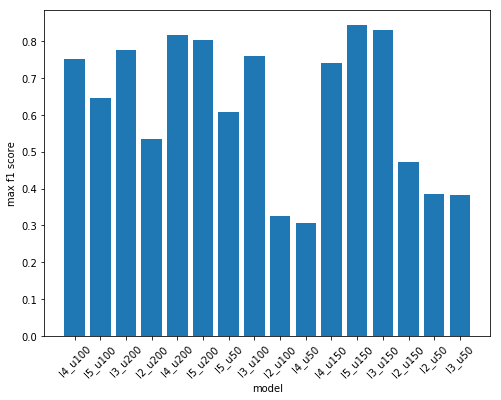

In [42]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.bar(range(len(maxf1)), list(maxf1.values()), align='center')
ax.set_xticks(range(len(maxf1)))
ax.set_xticklabels(list(maxf1.keys()), rotation=45)
ax.set_ylabel("max f1 score")
ax.set_xlabel("model")
fig.savefig("f1_barchart.pdf")